In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import requests
import json
import time

In [3]:
import tweepy

### NOTE: SOME PARTS OF THIS NOTEBOOK HAVE COMMENTED OUT SO CERTAIN INTERNET OPERATIONS ARE NOT REPEATED. TO RUN THEM AGAIN, JUST UNCOMMENT THE GIVEN PARTS. INSTRUCTIONS ARE PROVIDED

# DATA GATHERING

### GATHER DATA SOURCE 1: TWITTER ARCHIVE DATASET

In [4]:
twitter_archive_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
twitter_archive_enhanced.shape

(2356, 17)

### GATHER DATA SOURCE 2: IMAGE PREDICTION DATASET 

In [6]:
# image prediction dataset
# Commented out as the dataset is now stored locally after running this once

#r = requests\
#   .get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [7]:
#response_text = r.content.decode('utf-8')

In [8]:
# Save the file locally

#with open("image_predictions.tsv", "w") as f:
#    f.write(response_text)

In [6]:
image_predictions = pd.read_csv("image_predictions.tsv", sep="\t")
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### GATHER DATA SOURCE 3:  TWITTER DATA VIA API

In [7]:
#auth = tweepy.AppAuthHandler(API_KEY, SECRET_KEY)

In [8]:
#api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Using tweet_ids from the image dataset as we only want tweets which have a prediction

tweet_id_list = [str(tweet_id) for tweet_id in image_predictions.tweet_id.tolist()]
len(tweet_id_list)

2075

In [31]:
# Get Twitter data
# Commented so it is not mistakenly run over and over
# Uncomment to rerun

'''extracted_ids = []
error_ids = []

t1 = time.time()

for i, tweet_id in enumerate(tweet_id_list):
        if i%100 ==0:
            print(f"{i}th tweet_id: {tweet_id}")
        try:
            resp = api.get_status(tweet_id)
            extracted_ids.append(resp._json)
        except:
            error_ids.append(tweet_id)

runtime = time.time() - t1
runtime'''

0th tweet_id: 666020888022790149
100th tweet_id: 667782464991965184
200th tweet_id: 669680153564442624
300th tweet_id: 671488513339211776
400th tweet_id: 673688752737402881
500th tweet_id: 675845657354215424
600th tweet_id: 679736210798047232
700th tweet_id: 684800227459624960
800th tweet_id: 691416866452082688
900th tweet_id: 699801817392291840
1000th tweet_id: 708711088997666817
1100th tweet_id: 720775346191278080
1200th tweet_id: 740995100998766593
1300th tweet_id: 752660715232722944
1400th tweet_id: 768609597686943744
1500th tweet_id: 783839966405230592
1600th tweet_id: 799757965289017345
1700th tweet_id: 817056546584727552
1800th tweet_id: 831911600680497154
1900th tweet_id: 851464819735769094
2000th tweet_id: 876120275196170240


1749.8319969177246

In [33]:
# Failed to GET from Twitter API

#print(len(error_ids))
#error_ids

16


['680055455951884288',
 '754011816964026368',
 '759566828574212096',
 '771004394259247104',
 '779123168116150273',
 '802247111496568832',
 '829374341691346946',
 '837012587749474308',
 '837366284874571778',
 '842892208864923648',
 '844704788403113984',
 '851953902622658560',
 '861769973181624320',
 '872261713294495745',
 '873697596434513921',
 '888202515573088257']

In [34]:
#with open("tweet_json.txt", "w") as f:
#    f.write("\n".join(json.dumps(data) for data in extracted_ids))

In [8]:
# NOTE: If not running the twitter api code again, then replace "len(extracted_ids)" below
# with 2059. As the list "exttracted_ids" will not exist.

tweet_data_list = []

with open("tweet_json.txt", "r") as f:
    for i in range(len(extracted_ids)):
        tweet_data_list.append(json.loads(f.readline()))

In [9]:
len(tweet_data_list)

2059

In [10]:
tweet_data = pd.DataFrame.from_records(tweet_data_list)
tweet_data.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,443,2343,False,False,False,False,en,NaN
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,41,118,False,False,False,False,en,NaN
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,39,107,False,False,False,False,en,NaN
3,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,122,259,False,False,False,False,en,NaN
4,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,38,93,False,False,False,False,en,NaN


In [11]:
tweet_data.shape

(2059, 27)

# DATA WRANGLING

#### TWITTER ARCHIVE DATASET ASSESSMENT

In [12]:
# check shape to be sure size is right

twitter_archive_enhanced.shape

(2356, 17)

In [13]:
# Visually assess dataset

twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
# Assess data type of columns in dataset

twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# Check to make sure the tweet_ids are unique

len(twitter_archive_enhanced['tweet_id'].unique())

2356

In [16]:
# Check the number of null values in each column

twitter_archive_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
# QUALITY ISSUE 1

# By inspection, we notice that there are some None values as strings in the dataframe (QUALITY 1)
# which do not come up when we count nulls
# We have to convert these for uniformity sake
# Example below

twitter_archive_enhanced.doggo.values

array(['None', 'None', 'None', ..., 'None', 'None', 'None'], dtype=object)

In [20]:
# QUALITY ISSUE 2

# Timestamps are not saved as Datetime objects but String objects
# Doing any Timestamp arithmetic might cause unintended issues
# This makes us miss out on the many advantages of the Pandas Datetime object

type(twitter_archive_enhanced.timestamp[0])

str

In [23]:
# QUALITY ISSUE 3

# Some rows are retweets and as per the project directive, we need only original tweets not retweets

twitter_archive_enhanced[~twitter_archive_enhanced['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [25]:
# QUALITY ISSUE 4

# Assess ratings columns.
# Seems like most of the rating_denominators are 10
# Some ratings are do not have denominators as 10 

print(twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator']==10].shape[0])
twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator']!=10].shape[0]

2333


23

In [27]:
# Further assessment of QUALITY ISSUE 4

# - The numbers seem wrong as seen in the tweets below. Tweet says 9/10 but ratings_n is 1 and ratings_d is 2
# - They explicitly complain about the numbers in the other tweet

print(twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator']!=10].text[2335])
print(twitter_archive_enhanced[twitter_archive_enhanced['rating_denominator']!=10].text[313])

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [28]:
# QUALITY ISSUE 5

# Assess dog names
# Inspection of the names (see set below) reveals an interesting pattern. (QUALITY 5)
# Most sensible names begin with upper case
# The erroneous names begin with lower case and are generally just words: adjectives, articles etc 
# e.g. "a", "incredibly", "very"

# It would be better to replace these values with NaNs so they do not produce false insights
# E.g. the most popular name is "a" but this makes no sense

p = twitter_archive_enhanced.name.value_counts()
set(p.index.tolist())

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [29]:
# TIDY ISSUE 1

# ASSESS DOG STAGES

# By inspection, we notice that dog stage values have been spread out as columns (TIDY 1)
# We need to create one column "dog stage" with values as either "doggo", or "floofer" or "pupper"
# or "puppo" or a combination of these (or NaN where all values are NaN)

twitter_archive_enhanced[['doggo','floofer','pupper','puppo']].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


#### SUMMARY OF ISSUES WITH TWITTER ARCHIVE DATASET

QUALITY
1. Use of "None" strings to represent missing values
2. Timestamp values coded as String 
3. Some of the rows are retweets not original tweets
4. Ratings denominator has values other than 10
5. Some dog names were wrong i.e. just words

TIDY
1. Dog stage values were placed as columns

#### CLEANING THE TWITTER ARCHIVE DATASET

In [30]:
# CLEAN STEP 1: DEFINE

# ISSUE: Use of "None" string to represent missing values
# Solution:  Replace these strings with NaN values

# From the values we see that these are supposed to be null values or 'doggo'
twitter_archive_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [31]:
# CLEAN STEP 1: CODE

twitter_archive_enhanced_nn = twitter_archive_enhanced.replace(to_replace="None", value=np.NaN)
twitter_archive_enhanced_nn.doggo.value_counts()

doggo    97
Name: doggo, dtype: int64

In [32]:
# CLEAN STEP 1: TEST

# Check null counts again to be sure it is all consistent
# Now, we see the changes

twitter_archive_enhanced_nn.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [33]:
# CLEAN STEP 2: DEFINE

# ISSUE: Timestamp columns are stored as strings.
# SOLUTION: Might be more useful as Datetime objects (e.g. to extract year/day/weekday or date arithmetic)

In [34]:
# CLEAN STEP 2: CODE
twitter_archive_enhanced_nn['timestamp'] = pd.to_datetime(twitter_archive_enhanced_nn['timestamp'])
twitter_archive_enhanced_nn['retweeted_status_timestamp'] = pd.to_datetime(\
                                                           twitter_archive_enhanced_nn['retweeted_status_timestamp'])

In [35]:
# CLEAN STEP 2: TEST

# See tweets time range in data set and time difference

print(twitter_archive_enhanced_nn['timestamp'].max())
print(twitter_archive_enhanced_nn['timestamp'].min())
twitter_archive_enhanced_nn['timestamp'].max() - twitter_archive_enhanced_nn['timestamp'].min()

2017-08-01 16:23:56+00:00
2015-11-15 22:32:08+00:00


Timedelta('624 days 17:51:48')

In [36]:
# CLEAN STEP 3: DEFINE

# ISSUE: Retweets appearing among tweets
# SOLUTION: Get rid of observations that are retweets as project spec states

In [37]:
# CLEAN STEP 3: CODE

# Get retweets
retweets_df = twitter_archive_enhanced_nn[~twitter_archive_enhanced_nn['retweeted_status_id'].isnull()]

# Drop those rows from dataset
twitter_archive_enhanced_nn = twitter_archive_enhanced_nn.drop(retweets_df.index, axis=0)

In [38]:
# CLEAN STEP 3: TEST

# size check
print(retweets_df.shape[0])
print(twitter_archive_enhanced_nn.shape[0])

# Show what was removed
retweets_df

181
2175


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34+00:00,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07+00:00,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29+00:00,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,NaN,NaN,NaN
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23+00:00,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04+00:00,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50+00:00,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,NaN,NaN,NaN,NaN
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12+00:00,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,NaN,NaN,NaN,NaN
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52+00:00,https://twitter.com/twitter/status/71199827977...,12,10,NaN,NaN,NaN,NaN,NaN
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06+00:00,https://twitter.com/dogratingrating/status/667...,12,10,NaN,NaN,NaN,NaN,NaN


In [39]:
# CLEAN STEP 4: DEFINE

# ISSUE: Ratings denominator has values other than 10
# SOLUTION: We decide to drop these observations for the following reasons:
# - They make up ~1% of the dataset (22/2175)

In [40]:
# CLEAN STEP 4: CODE

# Get observations with bad ratings
bad_ratings = twitter_archive_enhanced_nn[twitter_archive_enhanced_nn['rating_denominator']!=10]

# Drop those rows from dataset
twitter_archive_enhanced_nn = twitter_archive_enhanced_nn.drop(bad_ratings.index, axis=0)

In [41]:
# CLEAN STEP 4: TEST

# size check
print(bad_ratings.shape[0])
print(twitter_archive_enhanced_nn.shape[0])

# Show what was removed
bad_ratings.head()

22
2153


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaT,NaN,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaT,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaT,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,NaN,NaN,NaN


In [42]:
# CLEAN STEP 5: DEFINE

# ISSUE: Erroneous dog names
# SOLUTION: We can replace these words with NaN

In [43]:
# CLEAN STEP 5: CODE 

# Get the names
twitter_archive_enhanced_nn[(~twitter_archive_enhanced_nn.name.isna()) \
                            & (twitter_archive_enhanced_nn.name.str.islower())].name

22       such
56          a
169     quite
193     quite
335       not
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 101, dtype: object

In [44]:
# CLEAN STEP 5: CODE 

# Replace with NaNs

ind = (twitter_archive_enhanced_nn[(~twitter_archive_enhanced_nn.name.isna()) \
                            & (twitter_archive_enhanced_nn.name.str.islower())].name.index)

twitter_archive_enhanced_nn.loc[ind, "name"] = np.NaN

In [45]:
# CLEAN STEP 5: TEST

twitter_archive_enhanced_nn.loc[:, "name"]

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2153, dtype: object

In [46]:
# CLEAN STEP 6: DEFINE

# ISSUE: Dog stage values are columns
# SOLUTION: Coalesce these values into a single column called 'DOG STAGE'

In [47]:
# CLEAN STEP 6: CODE

def coalesce_dog_stages(data):
    stage = ''
    
    if (pd.notna(data["doggo"])):
        stage = stage +' '+ 'doggo'
    if (pd.notna(data["floofer"])):
        stage = stage + ' ' + 'floofer'
    if (pd.notna(data["pupper"])):
        stage = stage + ' ' + 'pupper'
    if (pd.notna(data["puppo"])):
        stage = stage + ' ' + 'puppo'
    
    if stage == '':
        return np.NaN
    else:
        return stage.strip()

twitter_archive_enhanced_nn["dog_stages"] = twitter_archive_enhanced_nn[['doggo','floofer','pupper','puppo']]\
                                                .apply(coalesce_dog_stages, axis=1)

twitter_archive_enhanced_nn.dog_stages.value_counts()

pupper           224
doggo             75
puppo             24
doggo pupper      10
floofer            9
doggo floofer      1
doggo puppo        1
Name: dog_stages, dtype: int64

In [48]:
# CLEAN STEP 6: TEST

# We can see how the values have been coalesced into one column below

twitter_archive_enhanced_nn[pd.notna(twitter_archive_enhanced_nn.dog_stages)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,NaN,NaN,NaN,puppo,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,NaN,NaN,NaN,puppo,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,NaN,NaN,pupper,NaN,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,NaN,NaN,NaN,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,NaN,NaN,pupper,NaN,pupper
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,NaN,NaN,pupper,NaN,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,NaN,NaN,pupper,NaN,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,NaN,NaN,pupper,NaN,pupper


In [49]:
# CLEAN STEP 6: TEST

# We also drop the 4 redundant columns  as well
twitter_archive_enhanced_nn = twitter_archive_enhanced_nn.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

twitter_archive_enhanced_nn[pd.notna(twitter_archive_enhanced_nn.dog_stages)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,pupper
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,pupper


In [50]:
twitter_archive_enhanced_nn.shape

(2153, 14)

#### IMAGE PREDICTION DATASET ASSESSMENT

In [51]:
# Assess dataset column data types

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
# Assess data row and column counts

image_predictions.shape

(2075, 12)

In [53]:
# This dataset looks clean on first inspection

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### TWITTER API DATASET ASSESSMENT

In [54]:
# Assess the number of rows and columns in the dataset

tweet_data.shape

(2059, 27)

In [55]:
# Assess data types for the columns in the dataset

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2059 non-null   object 
 1   id                             2059 non-null   int64  
 2   id_str                         2059 non-null   object 
 3   text                           2059 non-null   object 
 4   truncated                      2059 non-null   bool   
 5   entities                       2059 non-null   object 
 6   extended_entities              1816 non-null   object 
 7   source                         2059 non-null   object 
 8   in_reply_to_status_id          23 non-null     float64
 9   in_reply_to_status_id_str      23 non-null     object 
 10  in_reply_to_user_id            23 non-null     float64
 11  in_reply_to_user_id_str        23 non-null     object 
 12  in_reply_to_screen_name        23 non-null     o

In [56]:
# Assess some of the values in the dataset

tweet_data.sample(5)

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status
498,Sat Dec 12 23:34:00 +0000 2015,675820929667219457,675820929667219457,Here's a handful of sleepy puppers. All look u...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675820925212823552, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,223,985,False,False,False,False,en,NaN
624,Sat Dec 26 17:12:55 +0000 2015,680798457301471234,680798457301471234,Say hello to Moofasa. He must be a powerful do...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680798406277599232, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,987,2727,False,False,False,False,en,NaN
876,Sat Feb 13 03:05:01 +0000 2016,698342080612007937,698342080612007937,This is Maximus. He's training for the tetherb...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698341973569245184, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,924,2179,False,False,False,False,en,NaN
1531,Mon Oct 24 15:53:19 +0000 2016,790581949425475584,790581949425475584,This is Duke. He sneaks into the fridge someti...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 790581940780924928, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,6976,20372,False,False,False,False,en,NaN
1401,Sun Aug 28 00:37:54 +0000 2016,769695466921623552,769695466921623552,This is Titan. He's trying to make friends. Of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 769695460001013760, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,None,False,1634,6278,False,False,False,False,en,NaN


In [57]:
# QUALITY ISSUE 6

# There are columns which are empty
# 'geo', 'coordinates', 'place', 'contributors'

tweet_data.loc[:, ['geo', 'coordinates', 'place', 'contributors']]

,geo,coordinates,place,contributors
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2054,None,None,None,None
2055,None,None,None,None
2056,None,None,None,None
2057,None,None,None,None


In [58]:
# TIDY ISSUE 2

# The user related columns should be separated to a different table
# Although this dataset has just one user, in other cases it is better to separate them
# as Tweets and Users are two separate entities.

tweet_data.loc[0,'user']

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'links and things ➜',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/6ytGi24QCk',
 'entities': {'url': {'urls': [{'url': 'https://t.co/6ytGi24QCk',
     'expanded_url': 'http://campsite.bio/weratedogs',
     'display_url': 'campsite.bio/weratedogs',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8968577,
 'friends_count': 17,
 'listed_count': 6398,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145803,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13483,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

#### SUMMARY OF ISSUES

QUALITY

1. There are empty columns cluttering the table: 'geo', 'coordinates', 'place', 'contributors'

TIDY

1. The user details can be separated to a different table as User is a different entity from Tweets

#### CLEANING THE TWITTER API DATASET

In [59]:
# CLEAN STEP 7: DEFINE

# ISSUE: There are empty columns cluttering the table: 'geo', 'coordinates', 'place', 'contributors'
# SOLUTION: Get rid of these useless columns

In [60]:
# CLEAN STEP 7: CODE

# Variables: 'geo', 'coordinates', 'place', 'contributors' are all mostly empty. (QUALITY 6)
# Delete them to de-clutter the column space

tweet_data = tweet_data.drop(['geo', 'coordinates', 'place', 'contributors'], axis=1)
tweet_data.shape

(2059, 23)

In [62]:
# CLEAN STEP 8: DEFINE

# ISSUE: Variable 'user' is a dictionary containing multiple user variables
# SOLUTION: Split column into user_id, user_name,  user_description, user_followers_count, user_friends_count
# (discard the rest and they do not tell us much for this analysis)

In [63]:
# CLEAN STEP 8: CODE

tweet_data['user_id'] = tweet_data['user'].apply(lambda x: x['id_str'])
tweet_data['user_name'] = tweet_data['user'].apply(lambda x: x['name'])
tweet_data['user_description'] = tweet_data['user'].apply(lambda x: x['description'])
tweet_data['user_followers_count'] = tweet_data['user'].apply(lambda x: x['followers_count'])
tweet_data['user_friends_count'] = tweet_data['user'].apply(lambda x: x['friends_count'])
tweet_data['user_url'] = tweet_data['user'].apply(lambda x: x['url'])

In [64]:
# CLEAN STEP 8: CODE

# Only one row taken since it is same for all observations
twitter_users = tweet_data.loc[:, ['user_id', 'user_name',  'user_description', 'user_followers_count',\
                                   'user_friends_count', 'user_url']]


tweet_data = tweet_data.drop(['user_name',  'user_description', 'user_followers_count',\
                              'user_friends_count', 'user_url', 'user'], axis=1)

In [65]:
# CLEAN STEP 8: TEST

# If we ever want all this extra columns back in our dataset, all we have to do is join on user_id

twitter_users.head()

,user_id,user_name,user_description,user_followers_count,user_friends_count,user_url
0,4196983835,WeRateDogs®,Your Only Source For Professional Dog Ratings ...,8968577,17,https://t.co/6ytGi24QCk
1,4196983835,WeRateDogs®,Your Only Source For Professional Dog Ratings ...,8968577,17,https://t.co/6ytGi24QCk
2,4196983835,WeRateDogs®,Your Only Source For Professional Dog Ratings ...,8968577,17,https://t.co/6ytGi24QCk
3,4196983835,WeRateDogs®,Your Only Source For Professional Dog Ratings ...,8968577,17,https://t.co/6ytGi24QCk
4,4196983835,WeRateDogs®,Your Only Source For Professional Dog Ratings ...,8968577,17,https://t.co/6ytGi24QCk


In [50]:
# Save table twitter users

# twitter_users.to_csv("twitter_users.csv", index=False)

## JOINING THE TABLES

In [66]:
# We join Image_predictions dataset to the twitter api dataset
# NOTE: we use a left join as we want to retain all the ids from the image dataset

image_api_tweets = image_predictions.merge(tweet_data, left_on="tweet_id", right_on="id", how="left")

# Assess the row and column counts of the joined dataset
print(image_api_tweets[pd.isna(image_api_tweets['id'])].shape[0])

image_api_tweets

16


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,user_id
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,False,443.0,2343.0,False,False,False,False,en,NaN,4196983835
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,False,41.0,118.0,False,False,False,False,en,NaN,4196983835
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,False,39.0,107.0,False,False,False,False,en,NaN,4196983835
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,False,122.0,259.0,False,False,False,False,en,NaN,4196983835
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,False,38.0,93.0,False,False,False,False,en,NaN,4196983835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,...,False,8133.0,36586.0,False,False,False,False,en,NaN,4196983835
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,...,False,7544.0,38311.0,False,False,False,False,en,NaN,4196983835
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,...,False,3630.0,22810.0,False,False,False,False,en,NaN,4196983835
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,...,False,5491.0,30347.0,False,False,False,False,en,NaN,4196983835


In [67]:
# Next we join to the image_tweet_api dataset to the twitter archive dataset to form our master table
# We use inner join here because there is no point having image predictions without corresponding tweet details
# and vice versa

# Assess the dataset by viewing the joined dataset
print(twitter_archive_enhanced_nn.shape)
print(image_api_tweets.shape)
print()

master_draft = image_api_tweets.merge(twitter_archive_enhanced_nn,\
                                       left_on="tweet_id", right_on="tweet_id", how="inner")

(2153, 14)
(2075, 35)



#### ASSESSMENT OF THE JOINED DATASET

In [68]:
# Assess the row and column count of the dataset
# Assess the data type of the dataset

master_draft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1976 non-null   int64              
 1   jpg_url                        1976 non-null   object             
 2   img_num                        1976 non-null   int64              
 3   p1                             1976 non-null   object             
 4   p1_conf                        1976 non-null   float64            
 5   p1_dog                         1976 non-null   bool               
 6   p2                             1976 non-null   object             
 7   p2_conf                        1976 non-null   float64            
 8   p2_dog                         1976 non-null   bool               
 9   p3                             1976 non-null   object             
 10  p3_conf                 

In [70]:
# QUALITY ISSUE 7

# Some observations do not match (those 16 ids which could not be fetched from the api) (QUALITY 7)
# There is not much to do about this as we could not get those tweets from the API.

image_api_tweets[image_api_tweets.id.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,user_id
607,680055455951884288,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1,Samoyed,0.995466,True,Great_Pyrenees,0.001834,True,Pomeranian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,754011816964026368,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1470,779123168116150273,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835,837012587749474308,https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg,1,toilet_tissue,0.186387,False,cowboy_hat,0.158555,False,sombrero,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1837,837366284874571778,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# QUALITY ISSUE 8

# We notice that there were several unmatched ids and we now have 1976 observations:
# down from 2153 (archive) and 2075 (image prediction) losing 177 and 99 observations 
# respectively. (QUALITY 8)

# There is not much to do about this as the specs need to be satisfied: tweets with image predictions

master_draft.shape

(1976, 48)

In [72]:
# QUALITY ISSUE 9

# After the joins, some columns now contain only null values
# 'retweeted_status', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

master_draft[['retweeted_status', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']]

,retweeted_status,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
0,NaN,NaN,NaN,NaT
1,NaN,NaN,NaN,NaT
2,NaN,NaN,NaN,NaT
3,NaN,NaN,NaN,NaT
4,NaN,NaN,NaN,NaT
...,...,...,...,...
1971,NaN,NaN,NaN,NaT
1972,NaN,NaN,NaN,NaT
1973,NaN,NaN,NaN,NaT
1974,NaN,NaN,NaN,NaT


In [74]:
# QUALITY ISSUE 10

# Duplicated columns after join

x_y_cols = [col for col in master_draft.columns if col[-1] in ('x', 'y')]

master_draft.loc[:, x_y_cols]

,text_x,source_x,in_reply_to_status_id_x,in_reply_to_user_id_x,in_reply_to_status_id_y,in_reply_to_user_id_y,source_y,text_y
0,Here we have a Japanese Irish Setter. Lost eye...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...
1,This is a western brown Mitsubishi terrier. Up...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...
2,Here is a very happy pup. Big fan of well-main...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...
3,This is a purebred Piers Morgan. Loves to Netf...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...
4,Here we have a 1949 1st generation vulpix. Enj...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...
...,...,...,...,...,...,...,...,...
1971,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...
1972,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...
1973,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...
1974,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....


#### SUMMARY OF ISSUES WITH JOINED DATASET

QUALITY

1. 16 rows not matched from the Twitter API dataset
2. There are unmatched IDs after joining to the archive dataset.
3. There are columns with only null values
4. There are some columns duplicated as a result of the join i.e. columns appearing in both datasets involved in join

####  CLEANING THE JOINED DATASET

In [83]:
# There is nothing to be done about issues 1 and 2 listed above

In [79]:
# CLEAN STEP 9: DEFINE

# ISSUE: Columns with only null values after join
# SOLUTION: Drop the useless columns

In [77]:
# CLEAN STEP 9: CODE

# Drop all columns that have to do with retweeted status as they now contain only null values

master_draft = master_draft.drop(['retweeted_status', 'retweeted_status_id', \
                                 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [78]:
# CLEAN STEP 9: TEST

master_draft.shape

(1976, 44)

In [80]:
# CLEAN STEP 10: DEFINE

# ISSUE: Duplicate columns after join
# SOLUTION: Drop one set of these columns

In [81]:
# CLEAN STEP 10: CODE

# Inspect duplicated columns (ending with 'x' or 'y') and drop one set (QUALITY 10)
# We use the version from the archive dataset since we have more observations from there

# We drop the set of columns ending in 'y'

y_cols = [col for col in x_y_cols if col[-1] == "y"]

master_draft = master_draft.drop(y_cols, axis=1)

In [82]:
# CLEAN STEP 10: TEST

print(master_draft.shape)
master_draft

(1976, 40)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,possibly_sensitive,possibly_sensitive_appealable,lang,user_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,False,False,en,4196983835,2015-11-15 22:32:08+00:00,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,False,False,en,4196983835,2015-11-15 23:05:30+00:00,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,False,False,en,4196983835,2015-11-15 23:21:54+00:00,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,False,False,en,4196983835,2015-11-16 00:04:52+00:00,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,False,False,en,4196983835,2015-11-16 00:24:50+00:00,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,...,False,False,en,4196983835,2017-07-29 16:00:24+00:00,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
1972,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,...,False,False,en,4196983835,2017-07-30 15:58:51+00:00,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
1973,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,...,False,False,en,4196983835,2017-07-31 00:18:03+00:00,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
1974,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,...,False,False,en,4196983835,2017-08-01 00:17:27+00:00,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


In [79]:
# Master table created here
# Commented so master table is not mistakenly overwritten

# master_draft.to_csv("twitter_archive_master.csv", index=False)

# EDA AND INSIGHTS

In [80]:
master_draft = pd.read_csv("twitter_archive_master.csv")
master_draft.shape

(1976, 44)

In [81]:
master_draft.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,rating,year,month,day
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08+00:00,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,0.8,2015,11,15
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30+00:00,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,0.7,2015,11,15
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54+00:00,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,0.9,2015,11,15
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,2015-11-16 00:04:52+00:00,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,0.6,2015,11,16
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50+00:00,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,0.5,2015,11,16


In [82]:
master_draft.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'id',
       'id_str', 'text_x', 'truncated', 'entities', 'extended_entities',
       'source_x', 'in_reply_to_status_id_x', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_x', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'user_id', 'timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stages', 'rating', 'year', 'month', 'day'],
      dtype='object')

In [61]:
# Q1: HAVE RATINGS GOTTEN BETTER WITH TIME? WHICH COULD MEAN DOGS ARE NOW CUTER

In [63]:
# Converting Timestamp column to datetime object again because joining 
# the dataset changed the format

master_draft["timestamp"] = pd.to_datetime(master_draft.timestamp)
print(f"Earliest Date: {master_draft.timestamp.min()}")
print(f"Latest Date: {master_draft.timestamp.max()}")

Earliest Date: 2015-11-15 22:32:08+00:00
Latest Date: 2017-08-01 16:23:56+00:00


In [64]:
# make new derived column dividing rating_num and denom to get single representative value

master_draft["rating"] = master_draft.rating_numerator / master_draft.rating_denominator
master_draft["rating"]

0       0.8
1       0.7
2       0.9
3       0.6
4       0.5
       ... 
1971    1.2
1972    1.3
1973    1.2
1974    1.3
1975    1.3
Name: rating, Length: 1976, dtype: float64

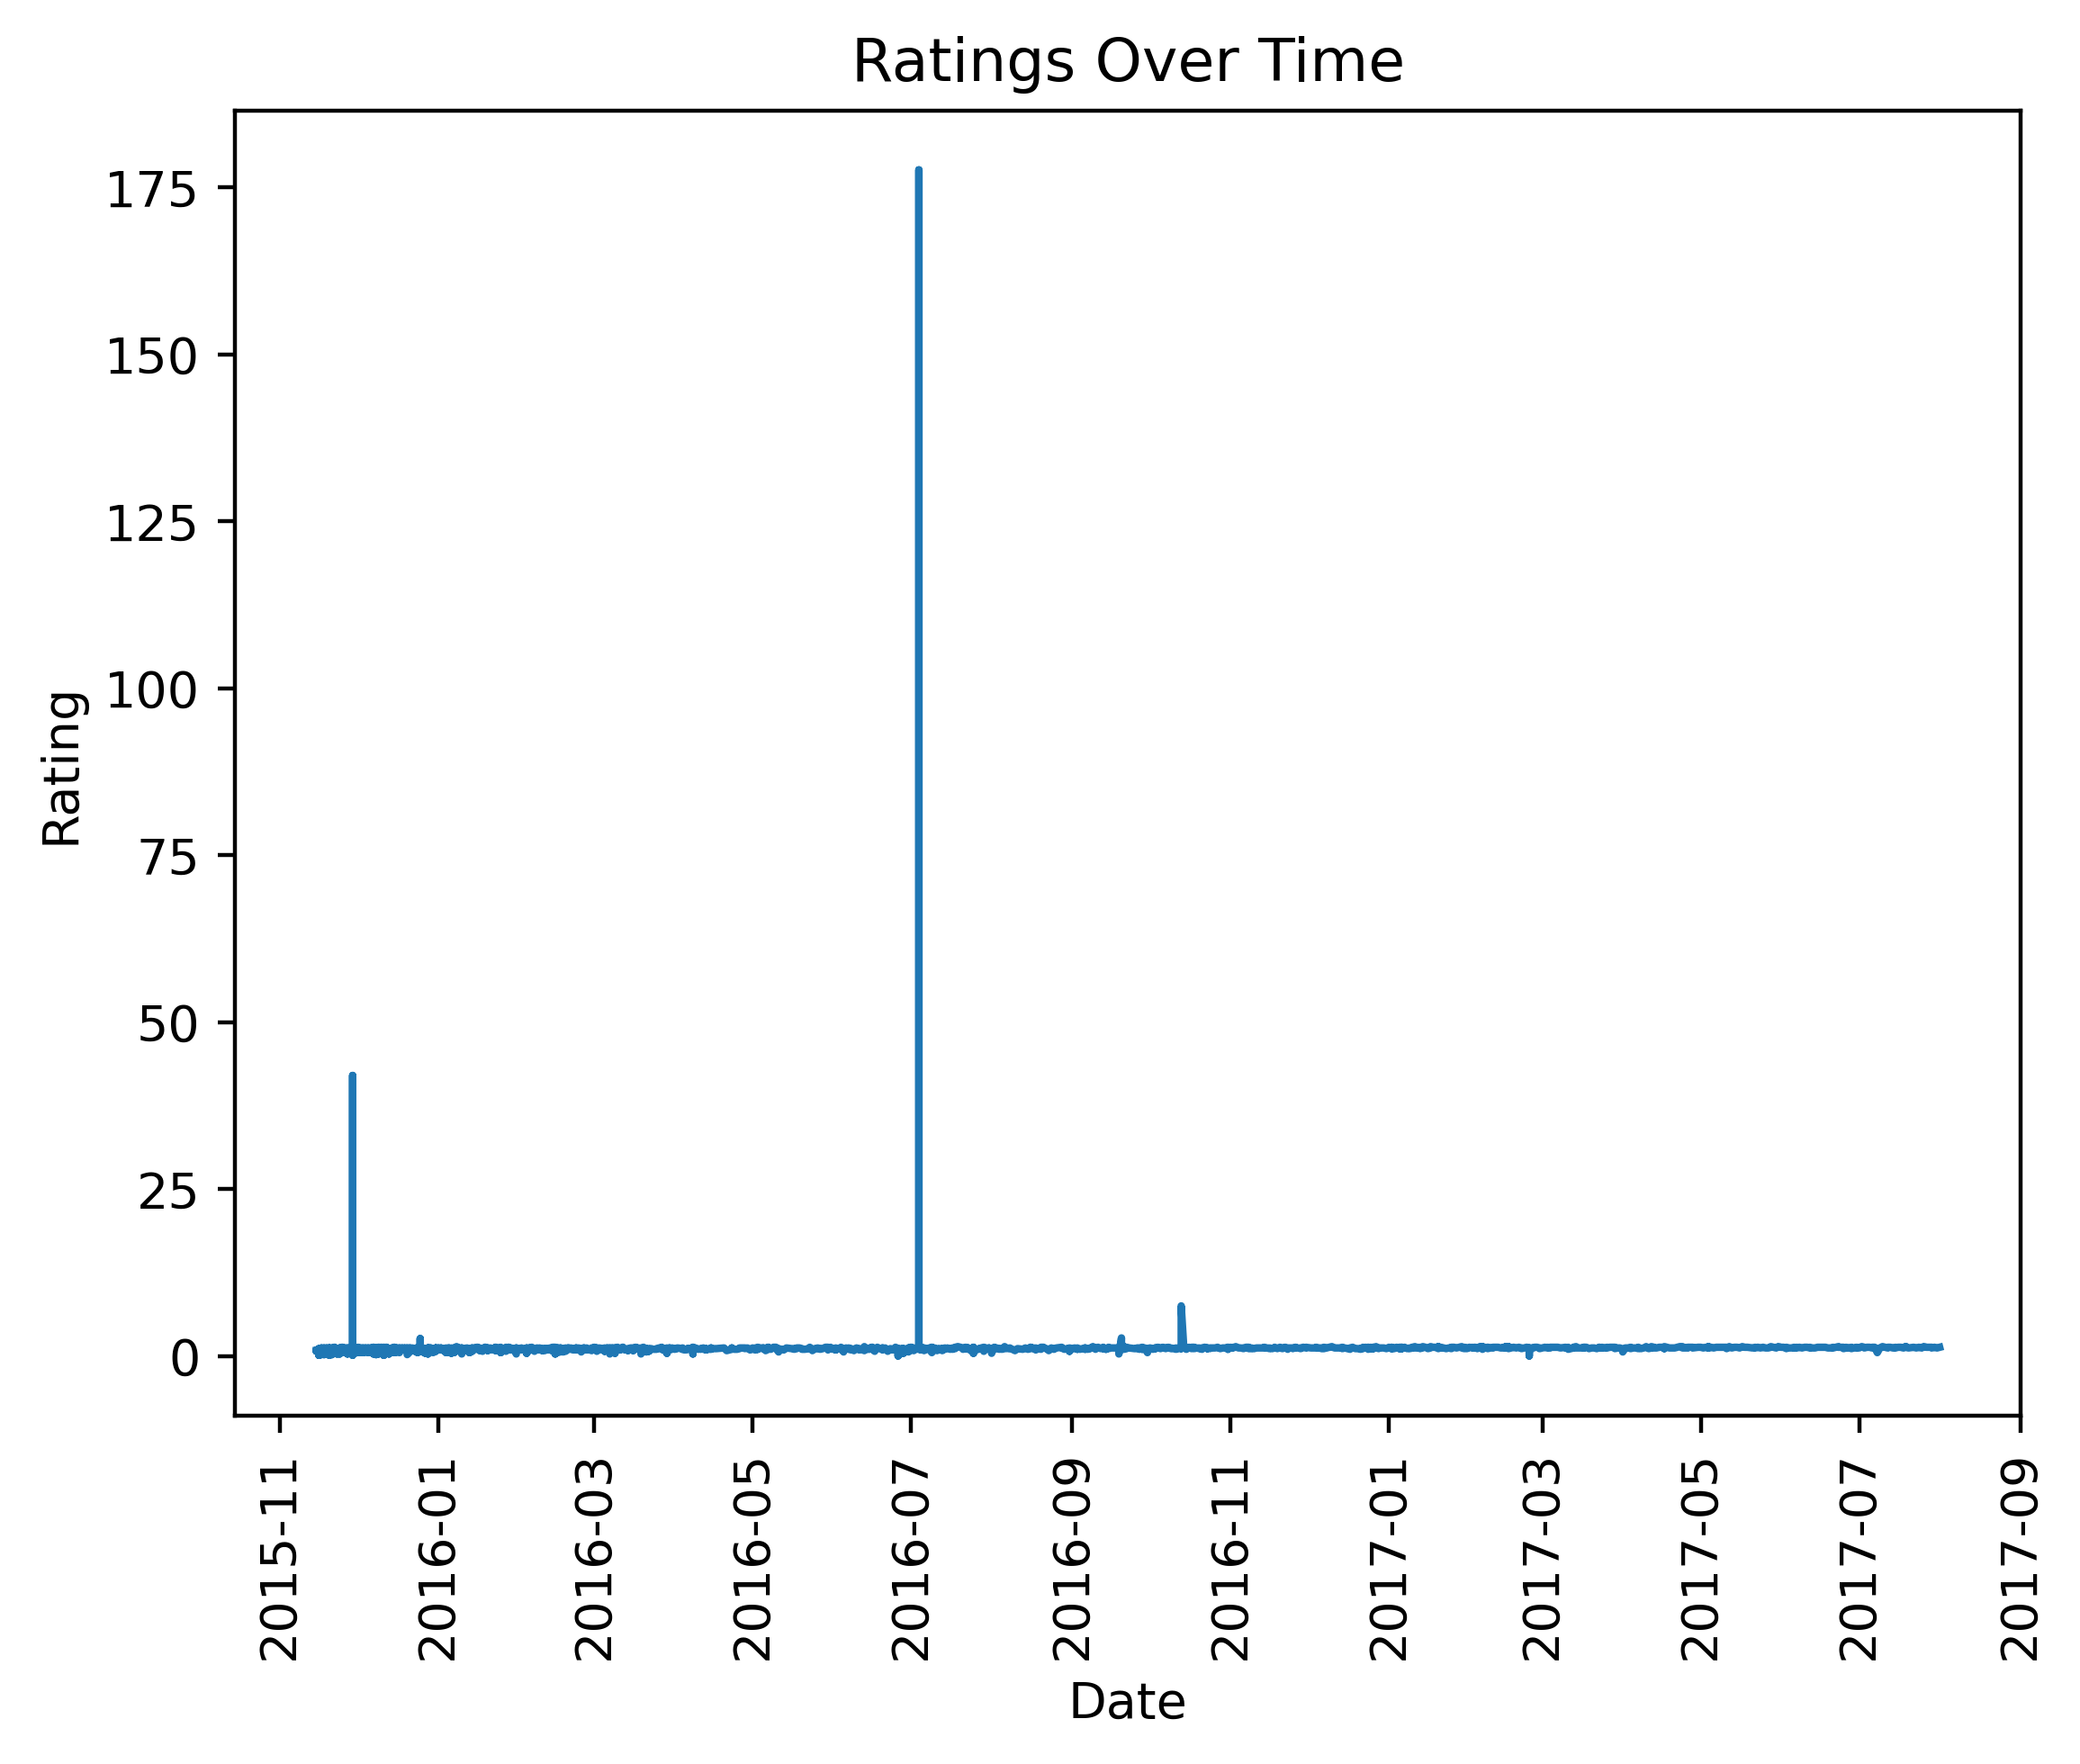

In [65]:
plt.figure(figsize=(6.4, 4.8), dpi=400)
plt.plot(master_draft.timestamp.dt.date, master_draft.rating)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Rating")
plt.title("Ratings Over Time")
plt.show()

In [66]:
# From the graph above, we immediately see that there are two massive outliers in the Ratings
# We can look at the top 5 highest rated tweets (dogs)

master_draft.sort_values(by="rating", ascending=False).head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,possibly_sensitive_appealable,lang,user_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,rating
1252,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,...,False,en,4.196984e+09,2016-07-04 15:00:45+00:00,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,177.6
274,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,...,False,en,4.196984e+09,2015-11-29 05:52:33+00:00,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,NaN,42.0
1474,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,...,False,en,4.196984e+09,2016-10-13 23:23:56+00:00,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,7.5
1424,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,...,False,en,4.196984e+09,2016-09-20 00:24:34+00:00,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,2.7
616,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,...,False,en,4.196984e+09,2015-12-25 21:06:00+00:00,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,NaN,2.6


In [67]:
# We group by month so as to unclutter the dataset and see the trend

master_draft["year"] = master_draft.timestamp.dt.year
master_draft["month"] = master_draft.timestamp.dt.month
master_draft["day"] = master_draft.timestamp.dt.day

# Removing the massive outliers
master_no_outliers = master_draft[master_draft.rating < 10]

ratings_by_month = master_no_outliers.groupby(["year", "month"]).agg({"rating":"mean"})

In [68]:
ratings_by_month = ratings_by_month.reset_index()
ratings_by_month["year_month"] = ratings_by_month[['year', 'month']]\
                                    .apply(lambda x: f"{x['year']}-{x['month']}", axis=1)
ratings_by_month

,year,month,rating,year_month
0,2015,11,0.891156,2015-11
1,2015,12,0.965479,2015-12
2,2016,1,1.011446,2016-1
3,2016,2,1.011009,2016-2
4,2016,3,1.041026,2016-3
5,2016,4,1.053846,2016-4
6,2016,5,1.087500,2016-5
7,2016,6,1.013750,2016-6
8,2016,7,1.081395,2016-7
9,2016,8,1.093220,2016-8


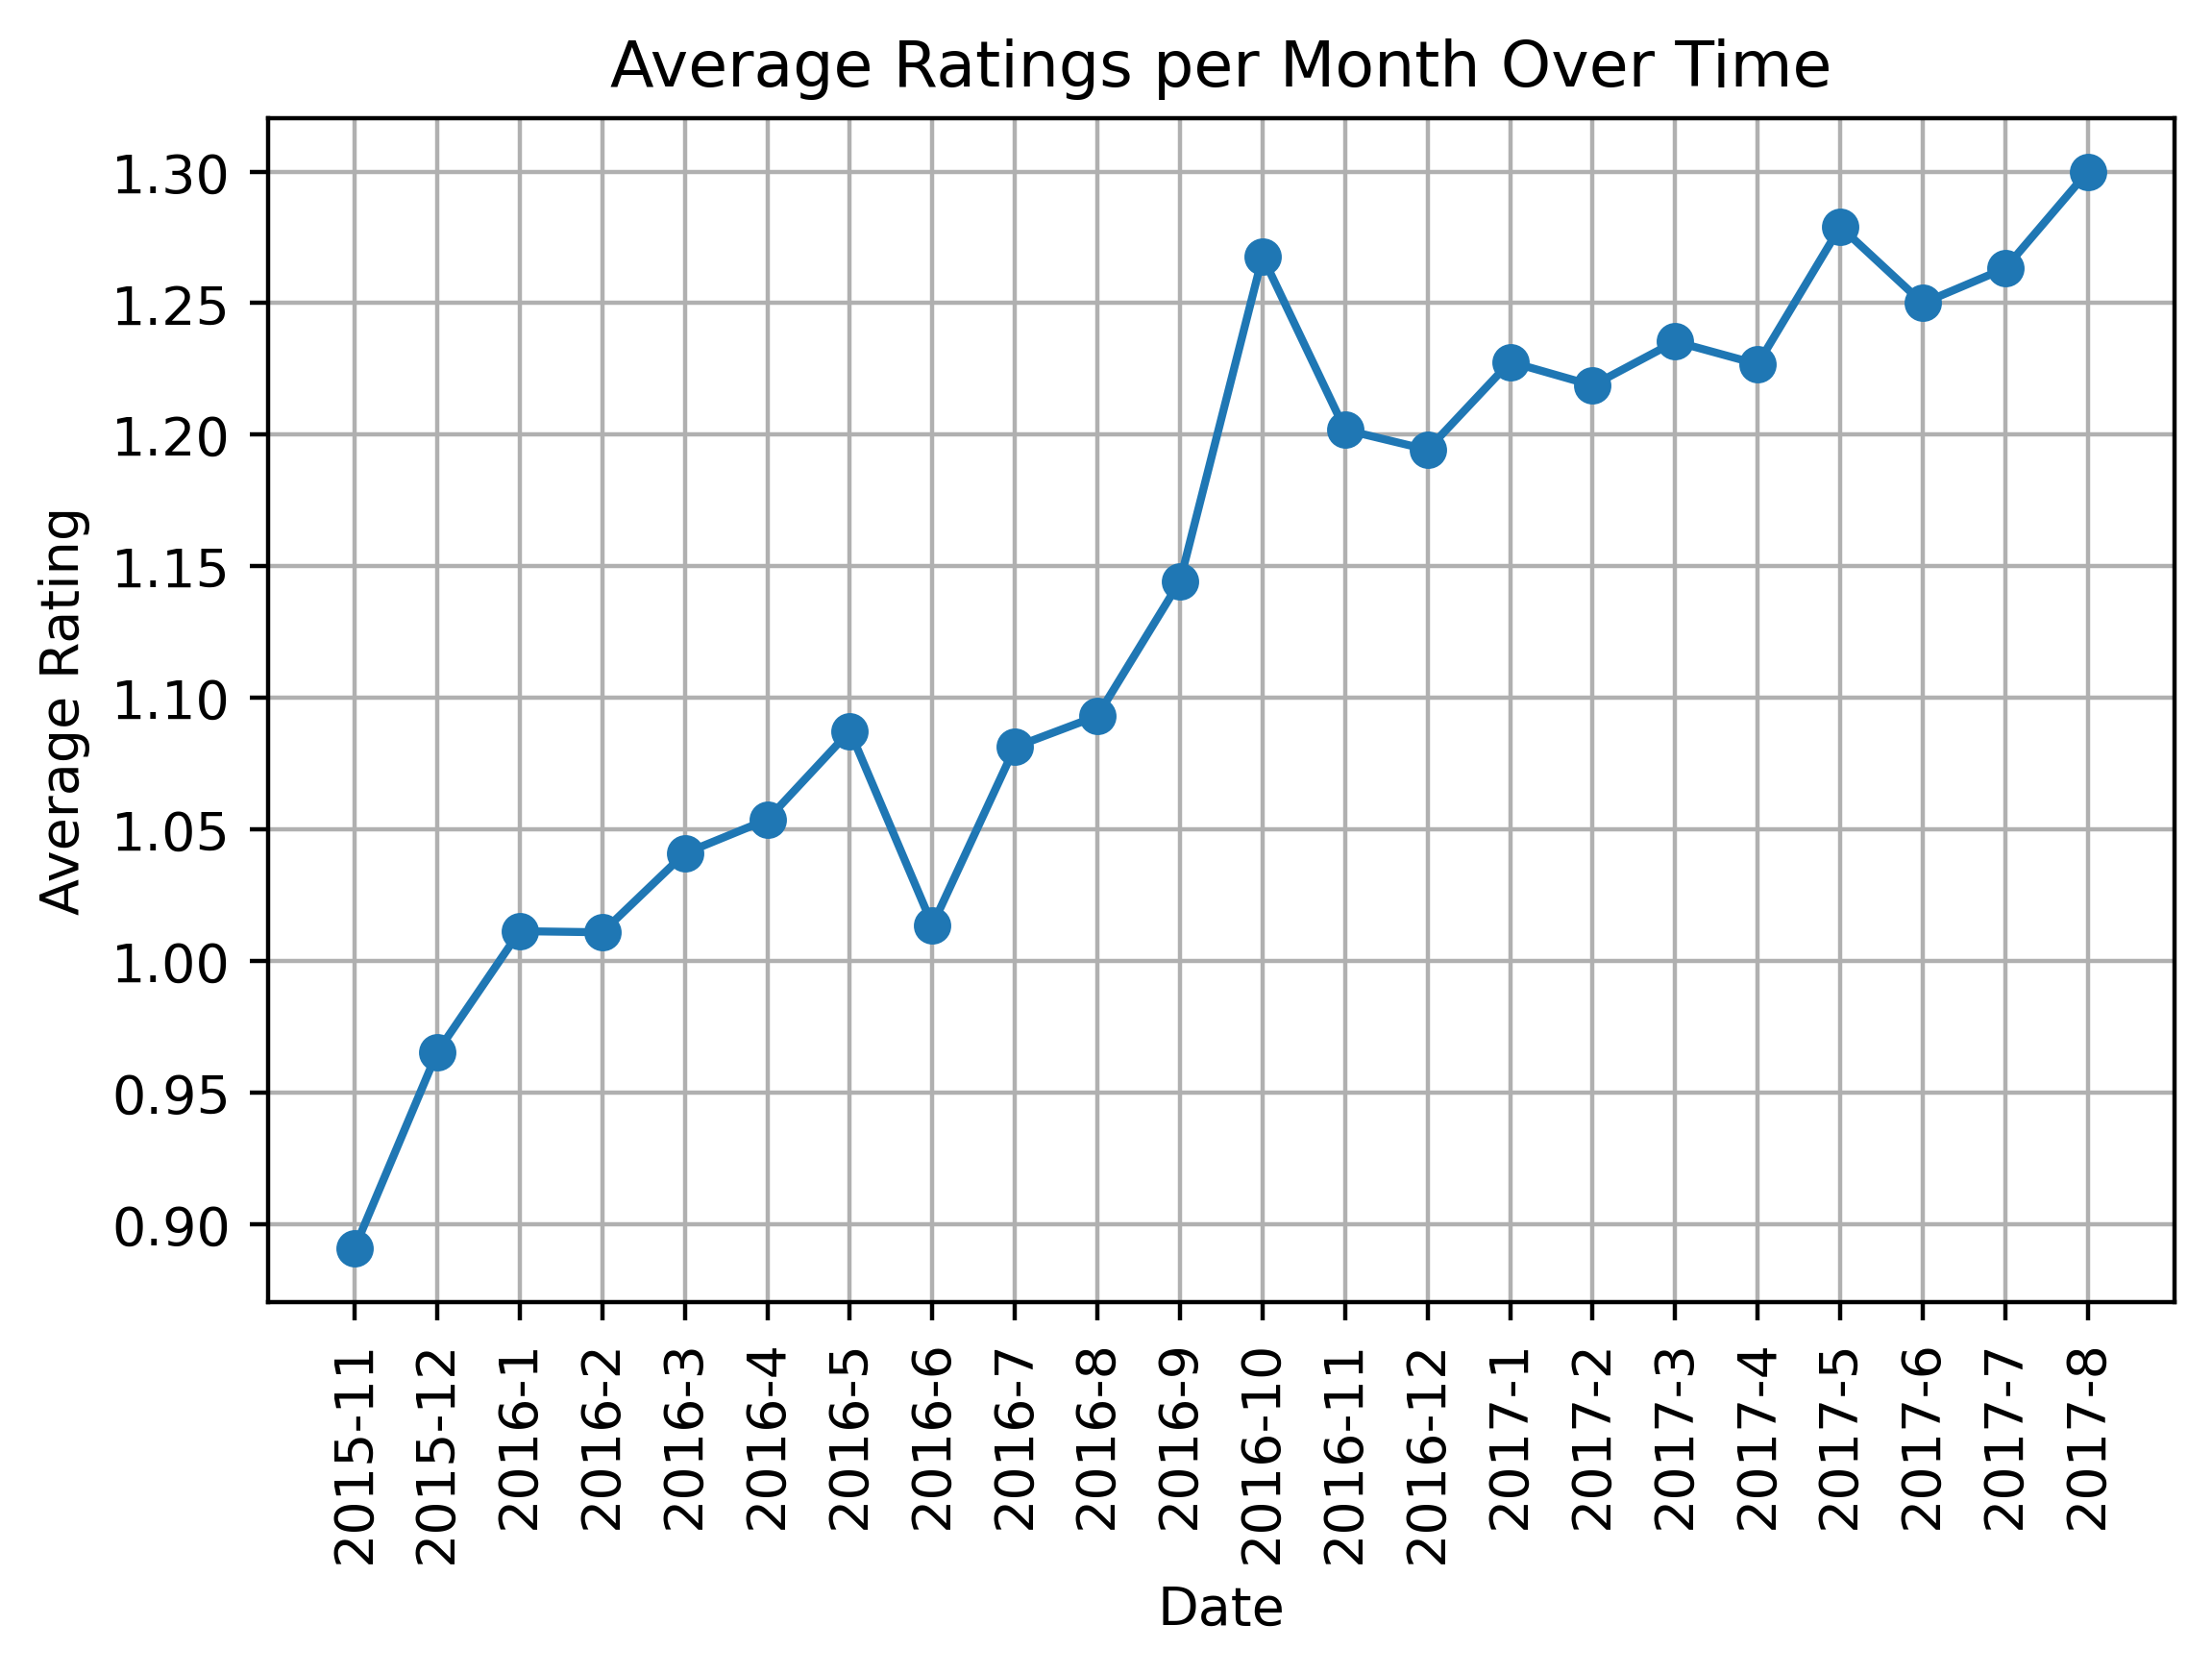

In [69]:
# We see that the general trend for Rating is upward

plt.style.use('default')
plt.figure(figsize=(6.4, 4.0), dpi=400)
plt.plot(ratings_by_month.year_month, ratings_by_month.rating, marker='o')
plt.xticks(rotation=90)
plt.grid(b=True, which="major")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.title("Average Ratings per Month Over Time")
plt.savefig("ratings_over_time", bbox_inches = "tight")
plt.show()

In [70]:
# Q2: WHAT ARE THE MOST POPULAR DOG STAGES

dog_stage_counts = master_draft.dog_stages.value_counts()
dog_stage_counts = dog_stage_counts.reset_index()
dog_stage_counts = dog_stage_counts.rename(columns={"dog_stages":"count", "index":"dog_stage"})
dog_stage_counts

,dog_stage,count
0,pupper,203
1,doggo,63
2,puppo,22
3,doggo pupper,9
4,floofer,7
5,doggo floofer,1
6,doggo puppo,1


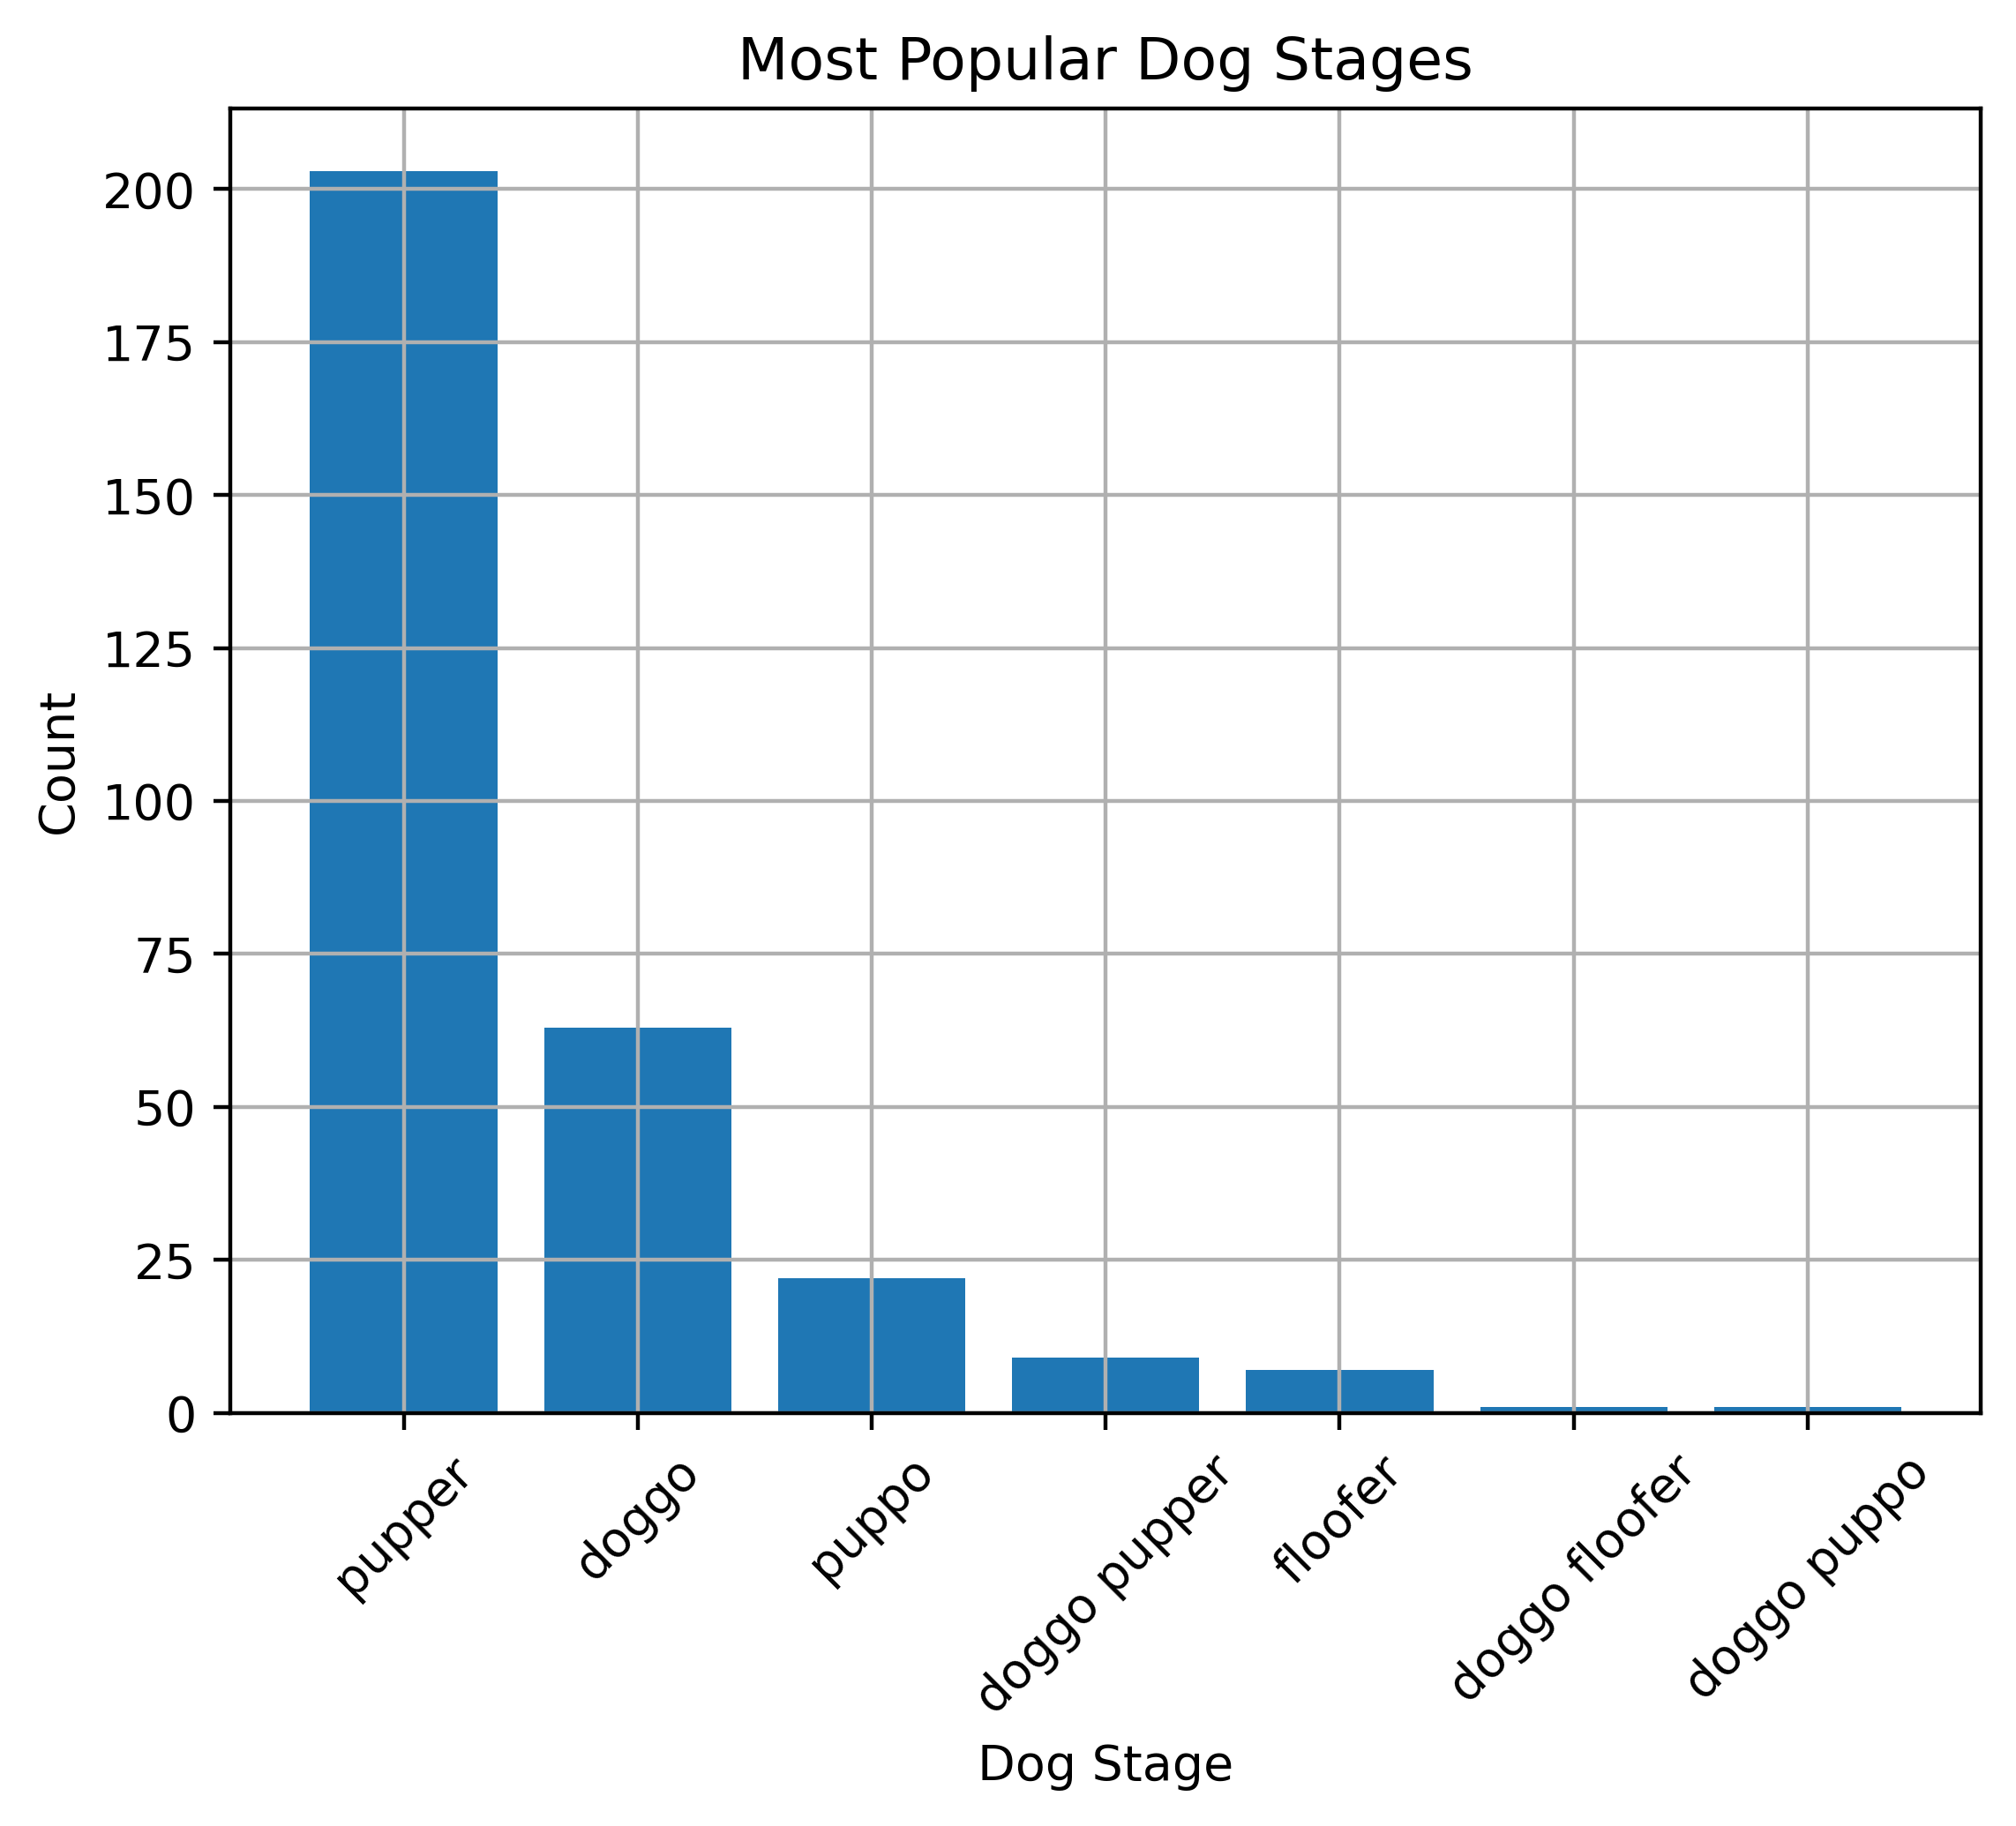

In [71]:
# We see that Puppers are the most common of all

plt.figure(figsize=(6.4, 4.8), dpi=400)
plt.xticks(rotation=45)
plt.grid(b=True, which="major")
plt.bar(data=dog_stage_counts, x="dog_stage", height="count")
plt.xlabel("Dog Stage")
plt.ylabel("Count")
plt.title("Most Popular Dog Stages")
plt.savefig("most_popular_dog_stages", bbox_inches = "tight")
plt.show()

In [72]:
# Q3: Which is the fan favourite dog according to our model
# We use the favorite_count to determine popularity amongst fans

# We see that a Labrador_retriever is the most popular dog breed according to fans on Twitter
# We also see that our model thinks some of the most popular dogs are NOT dogs.

top_dogs = master_draft.sort_values(by='favorite_count', ascending=False)[['p1', 'p1_conf', 'p1_dog', 'p2', 
                                                                           'p2_conf','p2_dog', 
                                                                           'timestamp', 'favorite_count']].head(10)
top_dogs = top_dogs.reset_index()
top_dogs = top_dogs.drop("index", axis=1)
top_dogs

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,timestamp,favorite_count
0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,2016-06-18 18:26:18+00:00,150676.0
1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,2017-01-21 18:26:02+00:00,128854.0
2,Chihuahua,0.505370,True,Pomeranian,0.120358,True,2016-12-09 06:17:20+00:00,116360.0
3,French_bulldog,0.905334,True,Boston_bull,0.078060,True,2017-05-22 00:28:40+00:00,112832.0
4,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,2016-06-04 23:31:25+00:00,111443.0
5,English_springer,0.383404,True,Boston_bull,0.134967,True,2017-06-26 19:07:24+00:00,96218.0
6,standard_poodle,0.351308,True,toy_poodle,0.271929,True,2017-01-11 02:15:36+00:00,85582.0
7,Angora,0.224218,False,malamute,0.216163,True,2017-05-02 00:04:57+00:00,83751.0
8,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,2017-06-01 20:18:38+00:00,76525.0
9,swing,0.929196,False,Bedlington_terrier,0.015047,True,2015-12-20 02:20:55+00:00,76471.0


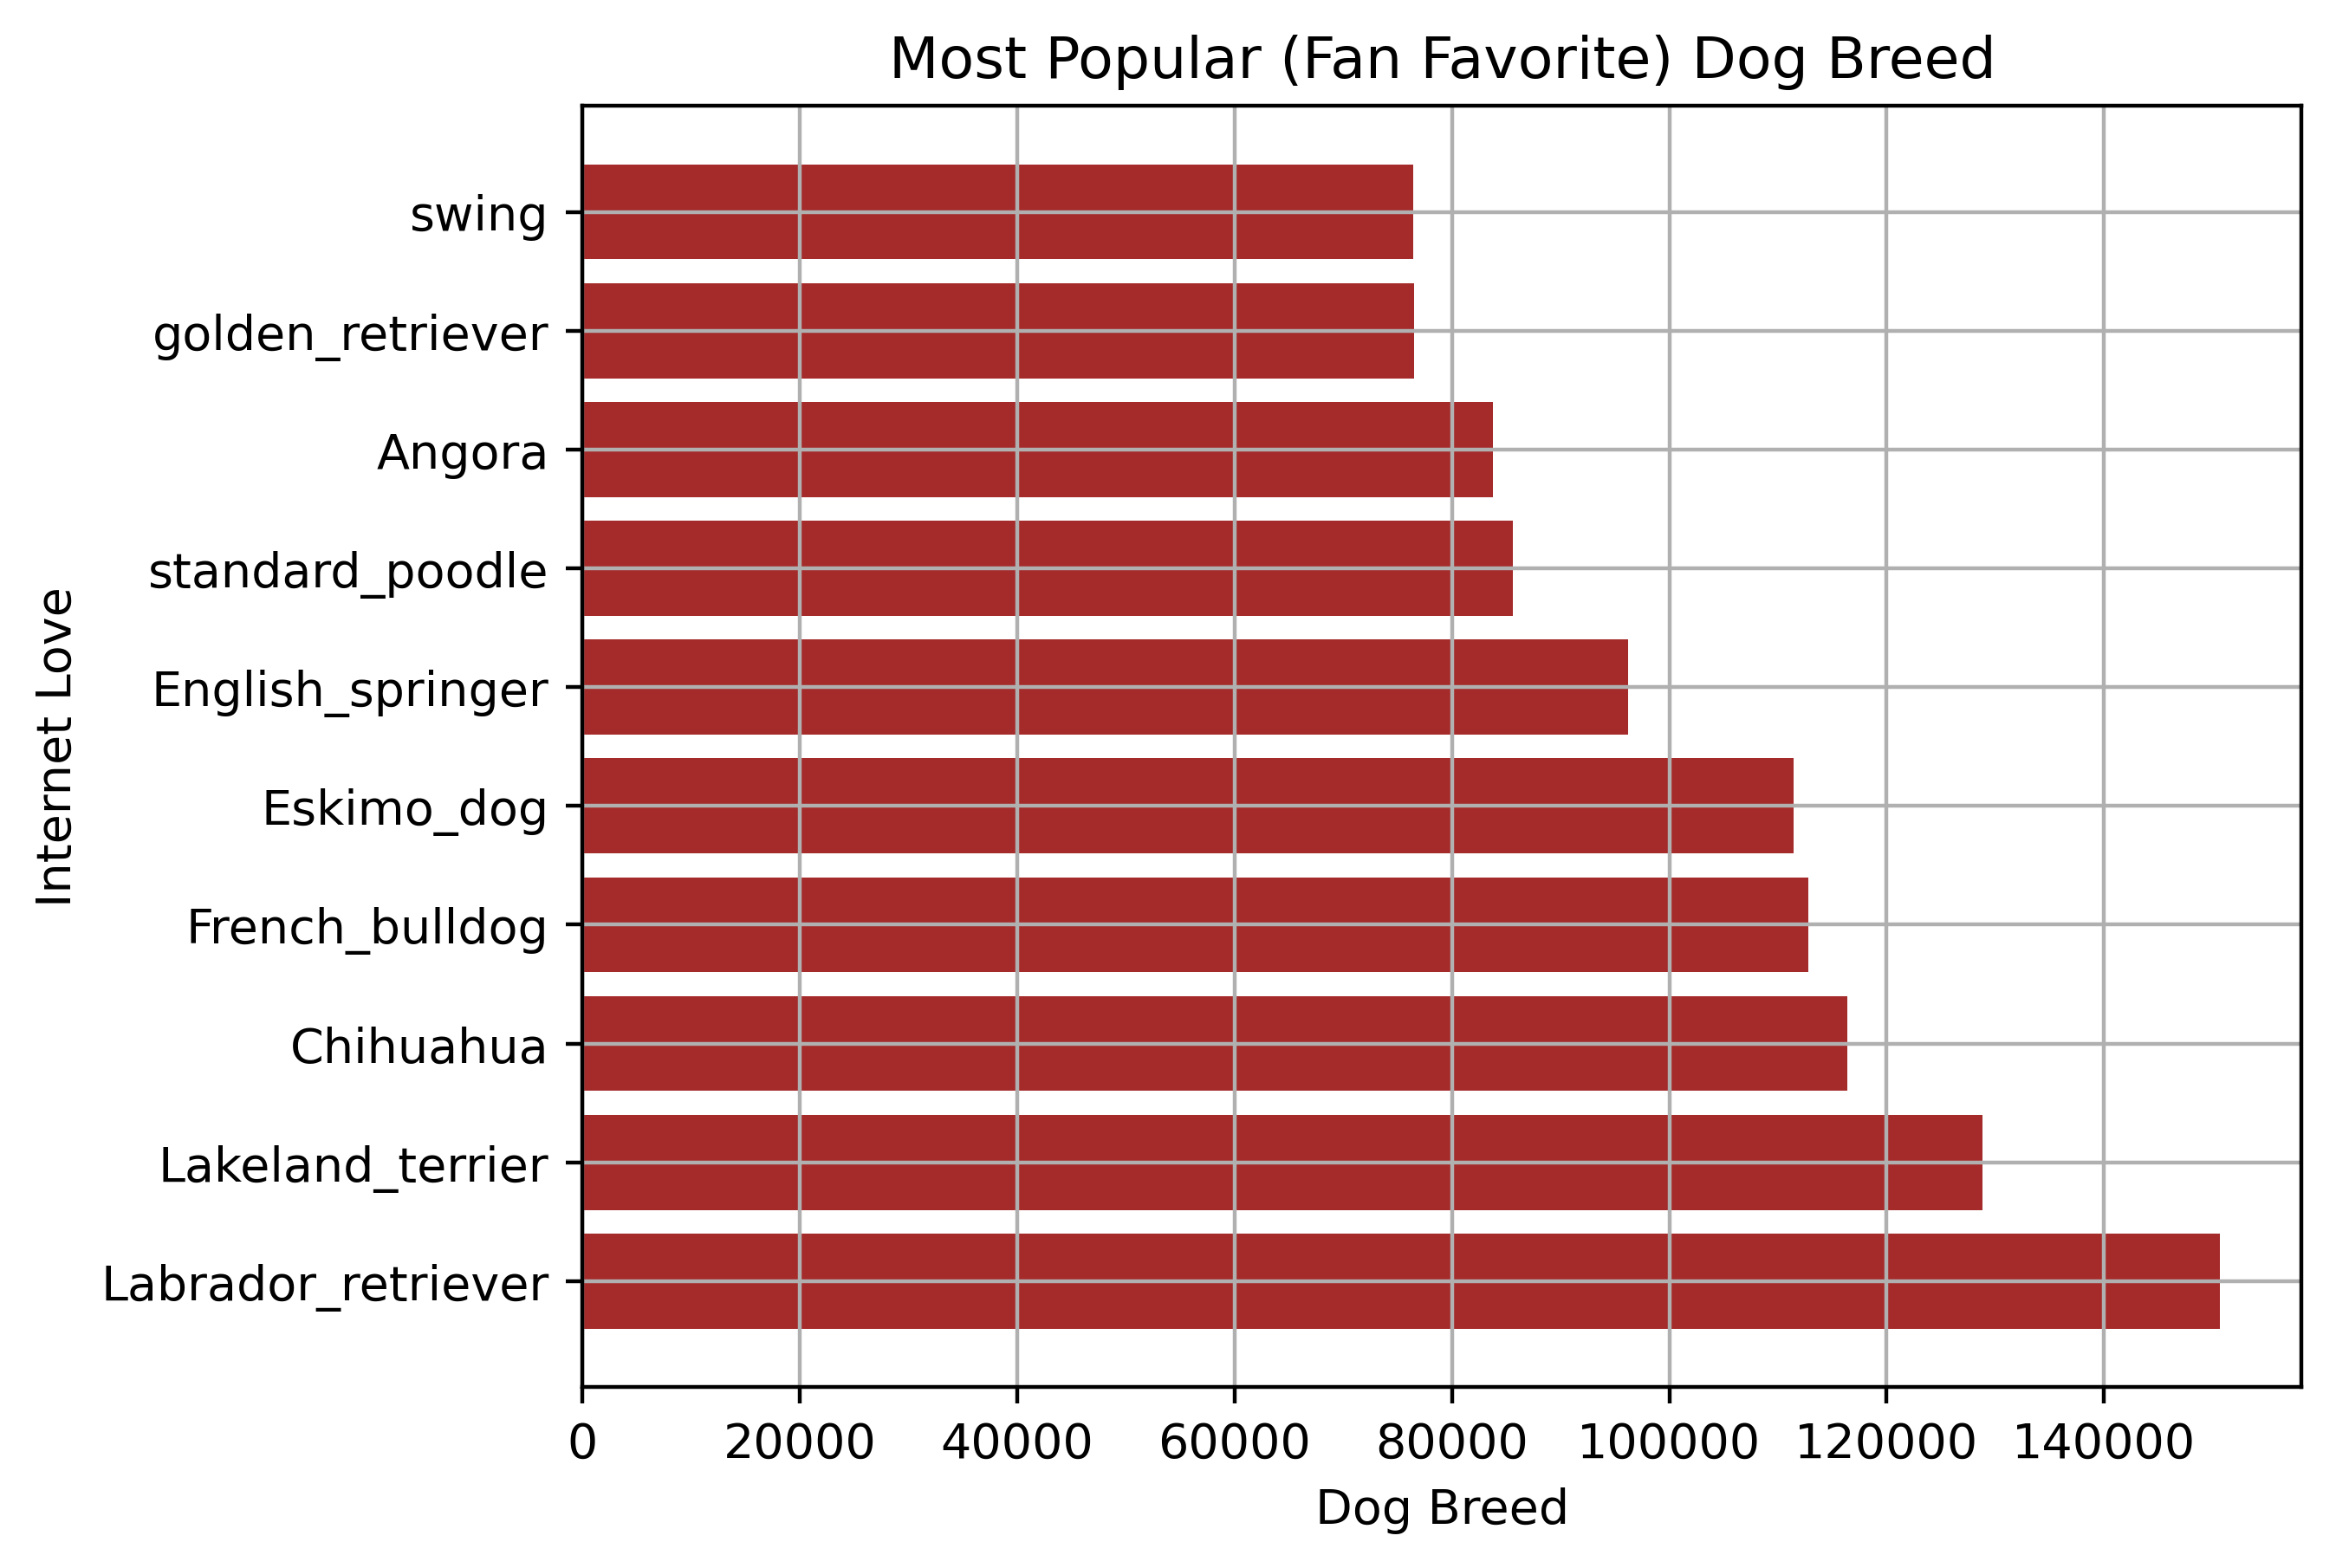

In [73]:
# We see that Puppers are the most common of all

plt.figure(figsize=(6.4, 4.8), dpi=400)
plt.barh(data=top_dogs, y="p1", width="favorite_count", color="brown")
plt.grid(b=True, which="major")
plt.xlabel("Dog Breed")
plt.ylabel("Internet Love")
plt.title("Most Popular (Fan Favorite) Dog Breed")
plt.savefig("most_popular_dog_breeds", bbox_inches = "tight")
plt.show()

In [74]:
# Q4: Are the most frequent dog names also the most loved by the fans?

# Get most frequent dog names. We decide on names that appear at least 5 times
most_freq_names = master_draft.name.value_counts()[master_draft.name.value_counts() > 4]
print(most_freq_names.shape[0])
most_freq_names

26


Charlie    11
Lucy       10
Oliver     10
Cooper     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Daisy       7
Lola        7
Toby        7
Stanley     6
Koda        6
Jax         6
Bella       6
Bo          6
Bailey      5
Milo        5
Scout       5
Oscar       5
Leo         5
Dave        5
Chester     5
Buddy       5
Louis       5
Rusty       5
Name: name, dtype: int64

In [75]:
# Most loved names

most_liked_names = master_draft.groupby('name').agg({'favorite_count':'sum'})\
                                .sort_values(by='favorite_count', ascending=False)
most_liked_names

,favorite_count
name,
Bo,165276.0
Stephan,116360.0
Jamesy,112832.0
Zoey,102216.0
Charlie,96623.0
...,...
Kallie,184.0
Fwed,179.0
Christoper,171.0


In [76]:
top_10_most_liked_names = most_liked_names.head(10)
print(len(top_10_most_liked_names))
top_10_most_liked_names

10


,favorite_count
name,
Bo,165276.0
Stephan,116360.0
Jamesy,112832.0
Zoey,102216.0
Charlie,96623.0
Duddles,96218.0
Penny,91125.0
Stanley,88281.0
Gary,87150.0


In [77]:
# Check the intersection

# Many gave these names to their dogs and many seemed to like those names!
# You should name your dog: Penny, Stanley, Bo or Charlie!

common_names = set(top_10_most_liked_names.index).intersection(set(most_freq_names.index))
print(common_names)
top_10_most_liked_names.loc[common_names, :]

{'Charlie', 'Stanley', 'Penny', 'Bo'}


,favorite_count
name,
Charlie,96623.0
Stanley,88281.0
Penny,91125.0
Bo,165276.0
